In [3]:
%pylab inline

import os
import numpy as np

from scipy.ndimage import imread
from scipy.misc import imresize
#import cv2
import sys

Populating the interactive namespace from numpy and matplotlib


/home/yunus/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# celebA

In [ ]:
def face_detect(image):
    cascPath = "FaceDetect-master/haarcascade_frontalface_default.xml"
    # Create the haar cascade
    faceCascade = cv2.CascadeClassifier(cascPath)

    # Read the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30, 30),
        flags = cv2.CASCADE_SCALE_IMAGE
    )

    print "Found {0} faces!".format(len(faces))
    
    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow("Faces found", image)
    if len(faces) != 1:
        return None, None
    else:
        return faces, image

In [ ]:
num_images = 202599
rand_idx = np.random.choice(range(num_images), size=(32,), replace=False)
#print rand_idx

X = imread("/Volumes/microSSD/celebA/img_align_celeba/%06d.jpg" % rand_idx[0])

faces, rect_image = face_detect(np.copy(X))

X_face = X[y:y+h, x:x+h, :]
X_face = imresize(X_face, size=(50,50), interp="bicubic")

if faces is not None:
    x, y, w, h = faces[0]

    figure(); imshow(X)
    figure(); imshow(rect_image)
    figure(); imshow(X_face)

    print faces

In [ ]:
X = imresize(X, size=0.5, interp="bicubic")

print X.shape

Xnorm = np.copy(X).astype(np.float64)
Xg = np.zeros((X.shape[0], X.shape[1], 1))
for i in xrange(3):
    Xnorm[:, :, i] /= 255.0
    #Xnorm[:, :, i] = Xnorm[:, :, i] * 2. - 1.
    
Xg[:, :, 0] = 0.2126 * Xnorm[:, :, 0] + 0.7152 * Xnorm[:, :, 1] + 0.0722 * Xnorm[:, :, 2]

print Xnorm.dtype

figure()
imshow(X)
figure() 
imshow(Xnorm)

figure()

imshow(Xg[:, :, 0], cmap="gray")

print Xg.min(), Xg.max()

In [ ]:
with open("/Volumes/microSSD/celebA/Anno/list_attr_celeba.txt") as bbf:
    lines = [line.strip() for line in bbf.readlines()]
    
print lines[0]

print [(fidx, ff) for (fidx, ff) in enumerate(lines[1].split(" "))]
    
facial_features = [ ]

In [ ]:
with open("/Volumes/microSSD/celebA/Anno/list_bbox_celeba.txt") as bbf:
    lines = [line.strip() for line in bbf.readlines()]
    
print lines[0]
print lines[1]

bboxes = []
for bb_idx, bb_line in enumerate(lines[2:10]):
    print bb_line
    info = [token for token in bb_line.split(" ") if len(token)]
    assert len(info) == 5
    print info
    bboxes.append({"i": int(info[0].split(".jpg")[0]),
                  "x": int(info[1]),
                  "y": int(info[2]),
                  "width": int(info[3]),
                  "height": int(info[4])})

In [ ]:
with open("/Volumes/microSSD/celebA/Anno/list_attr_celeba.txt") as af:
    lines = [line.strip() for line in af.readlines()]
    
print lines[0]
print lines[1]

attr_dict = {}
for bb_idx, bb_line in enumerate(lines[2:10]):
    info = [token for token in bb_line.split(" ") if len(token)]
    attr_dict[info[0]] = [int(tk) for tk in info[1:]]
    
print attr_dict["000001.jpg"]

# CIFAR-10

In [ ]:
import cPickle

def _convert_images(raw):
    """
    Convert images from the CIFAR-10 format and
    return a 4-dim array with shape: [image_number, height, width, channel]
    where the pixels are floats between 0.0 and 1.0.
    """
    # Convert the raw images from the data-files to floating-points.
    raw_float = np.array(raw, dtype=float) / 255.0

    # Reshape the array to 4-dimensions.
    images = raw_float.reshape([-1, 3, 32, 32])

    # Reorder the indices of the array.
    images = images.transpose([0, 2, 3, 1])

    return images

def process_batch(fn):
    fo = open(fn, 'rb')
    data_dict = cPickle.load(fo)
    fo.close()
    raw = data_dict["data"]
    images = _convert_images(raw)
    
    return images, data_dict["labels"]
    
    
def process_meta(mfn):
    # Convert from binary strings.
    fo = open(mfn, 'rb')
    data_dict = cPickle.load(fo)
    fo.close()
    raw = data_dict["label_names"]
    print data_dict.keys()
    names = [x.decode('utf-8') for x in raw]
    
    return names
    

batch_name = '/Users/yunus/Desktop/cifar-10-batches-py/data_batch_1'
images, labels = process_batch(batch_name)

meta_name = '/Users/yunus/Desktop/cifar-10-batches-py/batches.meta'
names = process_meta(meta_name)

print images.shape
print labels[:10]

print names


In [ ]:
rand_idx = np.random.randint(10000)

fig, ax = subplots(figsize=(2, 2))
ax.imshow(images[rand_idx], interpolation='nearest')

print names[labels[rand_idx]]

# SVHN

In [2]:
import scipy.io as sio

train_data = sio.loadmat("train_32x32.mat")

(32, 32, 3, 73257)
set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


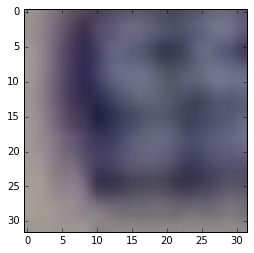

In [13]:
print train_data["X"].shape

i = np.random.randint(70000)

X = np.transpose(train_data["X"], [3, 0, 1, 2])

im = X[i] / 255.

figure()
imshow(im)

y = [yy[0] for yy in train_data["y"]]

print set(y)

# ImageNet

/home/yunus/data/imagenet/val_256/n02093256
['ILSVRC2012_val_256_00009642.JPEG', 'ILSVRC2012_val_256_00009051.JPEG', 'ILSVRC2012_val_256_00035952.JPEG', 'ILSVRC2012_val_256_00028332.JPEG', 'ILSVRC2012_val_256_00043171.JPEG', 'ILSVRC2012_val_256_00001710.JPEG', 'ILSVRC2012_val_256_00043305.JPEG', 'ILSVRC2012_val_256_00001844.JPEG', 'ILSVRC2012_val_256_00017865.JPEG', 'ILSVRC2012_val_256_00040678.JPEG', 'ILSVRC2012_val_256_00030399.JPEG', 'ILSVRC2012_val_256_00044003.JPEG', 'ILSVRC2012_val_256_00037318.JPEG', 'ILSVRC2012_val_256_00027428.JPEG', 'ILSVRC2012_val_256_00047652.JPEG', 'ILSVRC2012_val_256_00044717.JPEG', 'ILSVRC2012_val_256_00009949.JPEG', 'ILSVRC2012_val_256_00039743.JPEG', 'ILSVRC2012_val_256_00033683.JPEG', 'ILSVRC2012_val_256_00011925.JPEG', 'ILSVRC2012_val_256_00034733.JPEG', 'ILSVRC2012_val_256_00011583.JPEG', 'ILSVRC2012_val_256_00013508.JPEG', 'ILSVRC2012_val_256_00000248.JPEG', 'ILSVRC2012_val_256_00016494.JPEG', 'ILSVRC2012_val_256_00032018.JPEG', 'ILSVRC2012_val_256

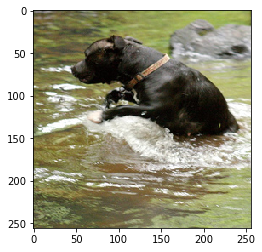

In [38]:
import glob
from scipy.ndimage import imread

dirnames = os.listdir("/home/yunus/data/imagenet/val_256")

rdir = os.path.join("/home/yunus/data/imagenet/val_256", np.random.choice(dirnames))

print rdir

print os.listdir(rdir)

for im_file in glob.glob(os.path.join(rdir, "*.JPEG")):
    X = imread(im_file)
    
print X.shape
print X.max(), X.min()

imshow(X)